In [14]:
import numpy as np
import matplotlib.pyplot as plt
import fitsio
from fitsio import FITS,FITSHDR
import os

from astropy import units as u
from astropy.coordinates import SkyCoord
from scipy import stats
from astropy.table import Table, Column
import matplotlib.colors as clr
import statsmodels.api as sm
import itertools as it
import pandas as pd
from io import StringIO 
from astropy.io import ascii
import math
import random
from scipy.interpolate import griddata
from sklearn import neighbors
import matplotlib.lines as mlines
import scipy
from scipy.stats import kde
from scipy.ndimage import gaussian_filter
from matplotlib.path import Path
import os
from gala.coordinates import MagellanicStreamNidever08
import matplotlib.image as mpimg
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

In [15]:
pix={}

In [16]:
for filename in os.listdir('/Users/amymiller/sync_bm/research/DELVE/datafiles/delvemc_blue_splits/'):
    
    print(filename)
    
    fx = fitsio.FITS('/Users/amymiller/sync_bm/research/DELVE/datafiles/delvemc_blue_splits/'+filename)

    
    print(filename[13:18])
    
    pix[filename[13:18]]=fx[1].read()


delvemc_blue_12159.fits
12159
delvemc_blue_11630.fits
11630
delvemc_blue_12270.fits
12270
delvemc_blue_11688.fits
11688
delvemc_blue_11372.fits
11372
delvemc_blue_12227.fits
12227
delvemc_blue_11364.fits
11364
delvemc_blue_12118.fits
12118
delvemc_blue_10575.fits
10575
delvemc_blue_11671.fits
11671
delvemc_blue_11108.fits
11108
delvemc_blue_12231.fits
12231
delvemc_blue_11299.fits
11299
delvemc_blue_11763.fits
11763
delvemc_blue_11276.fits
11276
delvemc_blue_11626.fits
11626
delvemc_blue_12266.fits
12266
delvemc_blue_11919.fits
11919
delvemc_blue_12071.fits
12071
delvemc_blue_11827.fits
11827
delvemc_blue_12026.fits
12026
delvemc_blue_11466.fits
11466
delvemc_blue_11870.fits
11870
delvemc_blue_10332.fits
10332
delvemc_blue_12030.fits
12030
delvemc_blue_12175.fits
12175
delvemc_blue_11759.fits
11759
delvemc_blue_11889.fits
11889
delvemc_blue_11923.fits
11923
delvemc_blue_11470.fits
11470
delvemc_blue_11020.fits
11020
delvemc_blue_11535.fits
11535
delvemc_blue_11866.fits
11866
delvemc_bl

delvemc_blue_12261.fits
12261
delvemc_blue_11764.fits
11764
delvemc_blue_12148.fits
12148
delvemc_blue_10460.fits
10460
delvemc_blue_10899.fits
10899
delvemc_blue_11621.fits
11621
delvemc_blue_12236.fits
12236
delvemc_blue_10572.fits
10572
delvemc_blue_11699.fits
11699
delvemc_blue_11363.fits
11363
delvemc_blue_11676.fits
11676
delvemc_blue_11549.fits
11549
delvemc_blue_11119.fits
11119
delvemc_blue_11375.fits
11375
delvemc_blue_12109.fits
12109
delvemc_blue_12277.fits
12277
delvemc_blue_11288.fits
11288
delvemc_blue_11210.fits
11210
delvemc_blue_12083.fits
12083
delvemc_blue_12200.fits
12200
delvemc_blue_11990.fits
11990
delvemc_blue_10682.fits
10682
delvemc_blue_11617.fits
11617
delvemc_blue_10905.fits
10905
delvemc_blue_10456.fits
10456
delvemc_blue_12191.fits
12191
delvemc_blue_11752.fits
11752
delvemc_blue_11302.fits
11302
delvemc_blue_11928.fits
11928
delvemc_blue_11882.fits
11882
delvemc_blue_10790.fits
10790
delvemc_blue_12257.fits
12257
delvemc_blue_12187.fits
12187
delvemc_bl

delvemc_blue_12028.fits
12028
delvemc_blue_11604.fits
11604
delvemc_blue_11192.fits
11192
delvemc_blue_11468.fits
11468
delvemc_blue_11891.fits
11891
delvemc_blue_10804.fits
10804
delvemc_blue_11203.fits
11203
delvemc_blue_11829.fits
11829
delvemc_blue_11983.fits
11983
delvemc_blue_10691.fits
10691
delvemc_blue_12213.fits
12213
delvemc_blue_11628.fits
11628
delvemc_blue_11278.fits
11278
delvemc_blue_12141.fits
12141
delvemc_blue_11297.fits
11297
delvemc_blue_12268.fits
12268
delvemc_blue_11014.fits
11014
delvemc_blue_12287.fits
12287
delvemc_blue_11385.fits
11385
delvemc_blue_11690.fits
11690
delvemc_blue_12116.fits
12116
delvemc_blue_11940.fits
11940
delvemc_blue_11805.fits
11805
delvemc_blue_11556.fits
11556
delvemc_blue_11106.fits
11106
delvemc_blue_11393.fits
11393
delvemc_blue_11686.fits
11686
delvemc_blue_12229.fits
12229
delvemc_blue_11110.fits
11110
delvemc_blue_11540.fits
11540
delvemc_blue_11813.fits
11813
delvemc_blue_11281.fits
11281
delvemc_blue_12157.fits
12157
delvemc_bl

In [58]:
def plot(ID,ra,dec,sig):
    
    fig, ax = plt.subplots(figsize=(10,10))
    h2=ax.hist2d(pix[ID]['ra'],pix[ID]['dec'],bins=200)
    ax.set_xlabel('ra')
    ax.set_ylabel('dec')
    ax.scatter(ra,dec,color='r',s=50,facecolors='none', edgecolors='r')
    for i in range(0,len(sig)):
        ax.annotate(str(np.round(sig[i],decimals=0)),(ra[i],dec[i]),color='r',size=10)
    #ax.scatter(28.77,-68.25,color='g',s=50,facecolors='none', edgecolors='g')
    

In [59]:
import pandas as pd
df=pd.read_csv('/Users/amymiller/sync_bm/research/DELVE/datafiles/out_11812.csv', sep=',',header=None)
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

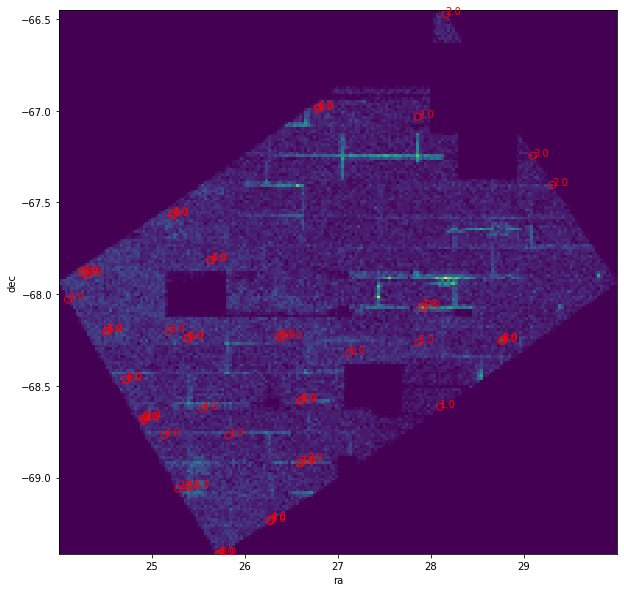

In [60]:
plot('11812',df[1].values,df[2].values,df[0].values)

(array([1., 1., 1., 2., 3., 1., 4., 3., 2., 4., 3., 4., 3., 0., 0., 5., 2.,
        4., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 0.63506187,  1.0645392 ,  1.49401653,  1.92349387,  2.3529712 ,
         2.78244853,  3.21192586,  3.64140319,  4.07088052,  4.50035785,
         4.92983518,  5.35931251,  5.78878984,  6.21826717,  6.6477445 ,
         7.07722183,  7.50669916,  7.93617649,  8.36565383,  8.79513116,
         9.22460849,  9.65408582, 10.08356315, 10.51304048, 10.94251781,
        11.37199514, 11.80147247, 12.2309498 , 12.66042713, 13.08990446,
        13.51938179, 13.94885912, 14.37833646, 14.80781379, 15.23729112,
        15.66676845, 16.09624578, 16.52572311, 16.95520044, 17.38467777,
        17.8141551 , 18.24363243, 18.67310976, 19.10258709, 19.53206442,
        19.96154175, 20.39101909, 20.82049642, 21.24997375, 21.67945108,
        22.10892841]),
 <BarContainer object

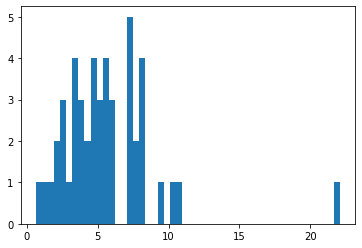

In [10]:
plt.hist(df[0].values,bins=50)

above 20 is junk, below 5 is good 

label plot with sig. value